In [ ]:
import tensorflow as tf
from keras import layers
from keras.models import Sequential

In [ ]:
#Sequential  model
seq_model = Sequential([
        layers.Flatten(input_shape=(28,28)),
        layers.Dense(128,activation='relu'),
        layers.Dense(10,activation='softmax')
])

In [ ]:
# functional API
# input -> layers -> define the model 

#step1 : input
from keras.layers import Input
input = Input(shape=(28,28))

#step2 : Layers
x = layers.Flatten()(input)
x = layers.Dense(128,activation='relu')(x)
predictions = layers.Dense(10,activation='softmax')(x) 

#step3 : define the model using input and output layers
from keras.models import Model
func_model = Model(inputs=input,outputs=predictions)

In [ ]:
from tensorflow.python.keras.utils.vis_utils import plot_model

In [ ]:
def build_functional_model():
  #step1 : input
  from keras.layers import Input
  input = Input(shape=(28,28))

  #step2 : Layers
  x = layers.Flatten()(input)
  x = layers.Dense(128,activation='relu')(x)
  predictions = layers.Dense(10,activation='softmax')(x) 

  #step3 : define the model using input and output layers
  from keras.models import Model
  func_model = Model(inputs=input,outputs=predictions)

  return func_model 

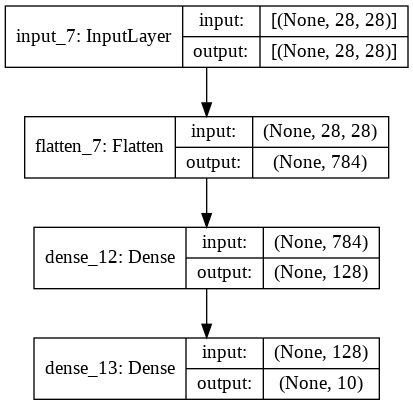

In [ ]:
#building and visualizing the model
model = build_functional_model()

plot_model(model,show_shapes=True,show_layer_names=True)

In [ ]:
#training the model 

from keras.datasets import mnist

(Xtrain,ytrain),(Xtest,ytest) = mnist.load_data()

#Normalizing
Xtrain = Xtrain / 255.0
Xtest = Xtest / 255.0


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

In [ ]:
model.fit(Xtrain,ytrain,epochs=1)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2663 - accuracy: 0.9240


In [ ]:
model.evaluate(Xtest,ytest)

313/313 [==============================] - 1s 1ms/step - loss: 0.1503 - accuracy: 0.9520


[0.1503392606973648, 0.9520000219345093]

**Multi-Output Model **

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras import layers
import pydot
from keras import Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Reading the dataset
df = pd.read_excel('/content/drive/MyDrive/data.xlsx')
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Splitting the data into training and testing
train,test = train_test_split(df,test_size=0.2)

In [ ]:
train.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.765489,670.797231,317.382736,176.707248,5.244300,3.516287,0.234121,2.833876,22.135928,24.403404
std,0.106995,88.720822,43.209542,45.254959,1.751418,1.127541,0.134581,1.545955,10.031623,9.439388
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000,6.010000,10.900000
25%,0.690000,588.000000,294.000000,147.000000,3.500000,3.000000,0.100000,2.000000,12.962500,15.602500
50%,0.740000,686.000000,318.500000,220.500000,3.500000,4.000000,0.250000,3.000000,18.775000,21.630000
75%,0.860000,735.000000,343.000000,220.500000,7.000000,5.000000,0.400000,4.000000,31.637500,32.927500
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000,43.100000,48.030000


In [ ]:
#Getting Y1 and Y2 the 2 outputs
def format_output(data):
  y1 = data.pop('Y1')
  y1 = np.array(y1)
  y2 = data.pop('Y2')
  y2 = np.array(y2)
  return y1,y2

In [ ]:
train_state = train.describe()
train_state.pop('Y1')
train_state.pop('Y2')
print(train_state)
train_state = train_state.transpose()
print(train_state)

               X1          X2          X3  ...          X6          X7          X8
count  614.000000  614.000000  614.000000  ...  614.000000  614.000000  614.000000
mean     0.765489  670.797231  317.382736  ...    3.516287    0.234121    2.833876
std      0.106995   88.720822   43.209542  ...    1.127541    0.134581    1.545955
min      0.620000  514.500000  245.000000  ...    2.000000    0.000000    0.000000
25%      0.690000  588.000000  294.000000  ...    3.000000    0.100000    2.000000
50%      0.740000  686.000000  318.500000  ...    4.000000    0.250000    3.000000
75%      0.860000  735.000000  343.000000  ...    5.000000    0.400000    4.000000
max      0.980000  808.500000  416.500000  ...    5.000000    0.400000    5.000000

[8 rows x 8 columns]
    count        mean        std     min     25%     50%     75%     max
X1  614.0    0.765489   0.106995    0.62    0.69    0.74    0.86    0.98
X2  614.0  670.797231  88.720822  514.50  588.00  686.00  735.00  808.50
X3  614.0  3

In [ ]:
train_y = format_output(train)
test_y = format_output(test)

In [ ]:
#Normalizing the data
def norm(data):
  return (data - train_state['mean'])/train_state['std']

In [ ]:
train_x = norm(train)
test_x = norm(test)

In [ ]:
#Input 
input = layers.Input(shape=(len(train_x.columns)))

#layers
first_dense = layers.Dense(128,activation='relu')(input)
second_dense = layers.Dense(128,activation='relu')(first_dense)

#Y1 output
y1_output = layers.Dense(1,name='y1_output')(second_dense)

#Y2 output
third_dense = layers.Dense(64,activation='relu')(second_dense)
y2_output = layers.Dense(1,name='y2_output')(third_dense)

#Define the model
model = Model(inputs=input,outputs=[y1_output,y2_output])
print(model.summary())


Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_26 (Dense)                (None, 128)          1152        input_12[0][0]                   
__________________________________________________________________________________________________
dense_27 (Dense)                (None, 128)          16512       dense_26[0][0]                   
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 64)           8256        dense_27[0][0]                   
____________________________________________________________________________________________

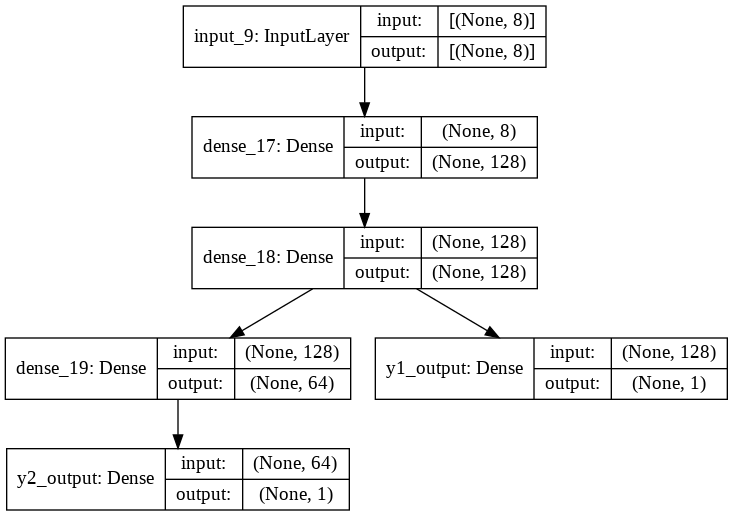

In [ ]:
plot_model(model,show_shapes=True,show_layer_names=True)

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(lr=0.0001),
    loss = {'y1_output':tf.keras.losses.MeanAbsoluteError(),
              'y2_output':tf.keras.losses.MeanAbsoluteError()},
    metrics = {'y1_output' : tf.keras.metrics.RootMeanSquaredError(),
               'y2_output' : tf.keras.metrics.RootMeanSquaredError()}
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
train_x.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], dtype='object')

In [ ]:
train_x

,X1,X2,X3,X4,X5,X6,X7,X8
390,-0.518608,0.447502,-1.108152,0.967690,-0.995936,1.315884,-0.996579,-0.539392
646,2.004870,-1.761675,-0.541148,-1.468508,1.002445,-1.344773,1.232563,-1.186242
252,0.883324,-0.933233,-0.541148,-0.656442,1.002445,0.428998,1.232563,0.754307
410,-0.985919,0.999797,0.025857,0.967690,-0.995936,1.315884,-0.996579,-0.539392
605,2.004870,-1.761675,-0.541148,-1.468508,1.002445,-1.344773,-0.996579,0.107457
...,...,...,...,...,...,...,...,...
444,2.004870,-1.761675,-0.541148,-1.468508,1.002445,-1.344773,0.117992,-0.539392
495,0.883324,-0.933233,-0.541148,-0.656442,1.002445,1.315884,1.232563,0.754307
289,-0.985919,0.999797,0.025857,0.967690,-0.995936,0.428998,-0.996579,-1.186242
459,-0.705533,0.723649,-0.541148,0.967690,-0.995936,-1.344773,0.117992,0.107457


In [ ]:
history = model.fit(train_x,train_y,epochs=2000,validation_data=(test_x,test_y))

Epoch 1/2000
20/20 [==============================] - 1s 24ms/step - loss: 46.8920 - y1_output_loss: 22.3116 - y2_output_loss: 24.5804 - y1_output_root_mean_squared_error: 24.4580 - y2_output_root_mean_squared_error: 26.3299 - val_loss: 48.6576 - val_y1_output_loss: 23.1630 - val_y2_output_loss: 25.4946 - val_y1_output_root_mean_squared_error: 25.3495 - val_y2_output_root_mean_squared_error: 27.3055
Epoch 2/2000
20/20 [==============================] - 0s 3ms/step - loss: 46.8714 - y1_output_loss: 22.3011 - y2_output_loss: 24.5703 - y1_output_root_mean_squared_error: 24.4482 - y2_output_root_mean_squared_error: 26.3201 - val_loss: 48.6375 - val_y1_output_loss: 23.1527 - val_y2_output_loss: 25.4848 - val_y1_output_root_mean_squared_error: 25.3400 - val_y2_output_root_mean_squared_error: 27.2961
Epoch 3/2000
20/20 [==============================] - 0s 3ms/step - loss: 46.8508 - y1_output_loss: 22.2906 - y2_output_loss: 24.5602 - y1_output_root_mean_squared_error: 24.4385 - y2_output_root

In [ ]:
#Testing the model and printing the loss
loss,Y1_loss,Y2_loss,Y1_rmse,Y2_rmse = model.evaluate(test_x)